In [22]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator) # Libraries required

In [23]:
file ="initial_spectra.csv" # Define spectra file here
file1 ="final_spectra.csv" # Can also define additional files and baseline correct them at the same time

In [24]:
def baseline_correct(filename, filenumber = 0, title = "Spectrum "): # This creates the baseline correct function
    # The arguments used are: filename = any_spectrum.CSV, filenumber = iterator if passing multiple spectra to keep track of which is which, title = desired string in front of filenumber
    # The default filenumber starts at 0 and the default title will read as "Spectrum "
    
    dataset = pd.read_csv(filename, header=None, low_memory=False) # How the file is read
    data = dataset.values # Creates dataset variable
    x = list(data[:,0]) # Splits the x and y data columns into individual variables
    y = list(data[:,1])
    for item in range(len(y)): # To baseline corrrect the spectrum, the lowest non-zero value needs to be found
        if(y[item] !=0):
            mini = y[item]       #initializes the max and mini variables for next if statement
    maxi = y[0]
    for i in range(len(y)): # Automatically scales the y axis so the min and max peak absorbance values can be found for later use
        if (y[i]<mini and y[i]!= 0):
            mini = y[i] 
        if (y[i]>maxi):
            maxi = y[i]
    for j in range(len(y)): # Performs the baseline correction by subtracting the minimum y value found earlier from all other y values
        y[j]= y[j]-mini
    fig,ax=plt.subplots(figsize=(7,5))         
    plt.plot(x,y, color="black", linewidth=1) # Plots the data on graph
    print("The minimum value to baseline correct spectrum", filenumber+1,"to is:",mini) # Prints the baseline value used for verification of output
    ax.xaxis.set_minor_locator(MultipleLocator(250)) # Sets the increments for the tick marks on the x and y axes
    ax.yaxis.set_minor_locator(MultipleLocator(0.01))
    plt.ylabel("Absorbance",fontsize=14, fontweight ="bold") # Labels the x and y axes
    plt.xlabel("Wavenumber ($cm^{-1}$)",fontsize=14, fontweight="bold")
    plt.title(title + str(filenumber+1))
    ax.invert_xaxis() # Inverts the x axis to provide a normal spectra readout, starting with higher values on left
    top = maxi+0.01 # Sets the top limit for y axis to be 0.01 above the max peak absorbance for easier reading of graph
    ax.set_xlim([3500,650]) # Sets the x axis to a typical IR spectrum range from 3500 to 650 wavenumbers, these values can be adjusted as necessary
    ax.set_ylim([-0.02,top]) # Sets the y axes from -0.02 to the max value + 0.01 to ensure consistent graph scaling regardless of spectrum file input, can also be adjusted as necessary

The minimum value to baseline correct spectrum 1 to is: 0.01411056
The minimum value to baseline correct spectrum 2 to is: 0.007244004


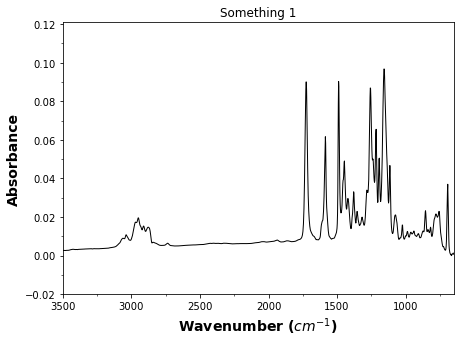

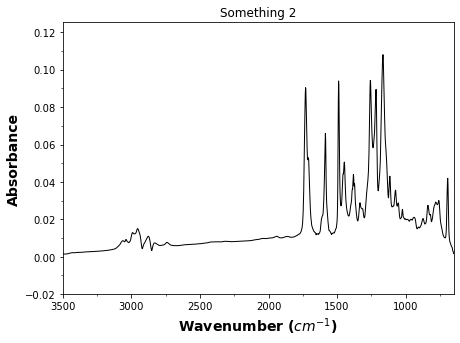

In [26]:
files = [file, file1] # Creats a list of spectra files to be baseline corrected
for i, item in enumerate(files): # By using a for loop to input each file into function, the function can be used for any number of spectra files needed
    baseline_correct(item, i, "Spectrum ") # Example of how to use the function, the file name can be changed here